### Comparison of segmentation and superpixel algorithms
[link to example](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html#sphx-glr-auto-examples-segmentation-plot-segmentations-py)

- Felzenszwalb's efficient graph based segmentation
- Quckshift image segmentation
- SLIC-K-Means based image-segmentation
- Compact watershed segmentation of gradient images

Felzenszwalb number of segments:194
SLIC number of segments: 	196
Quickshift number of segments: 	695
Watershed number of segments: 	256


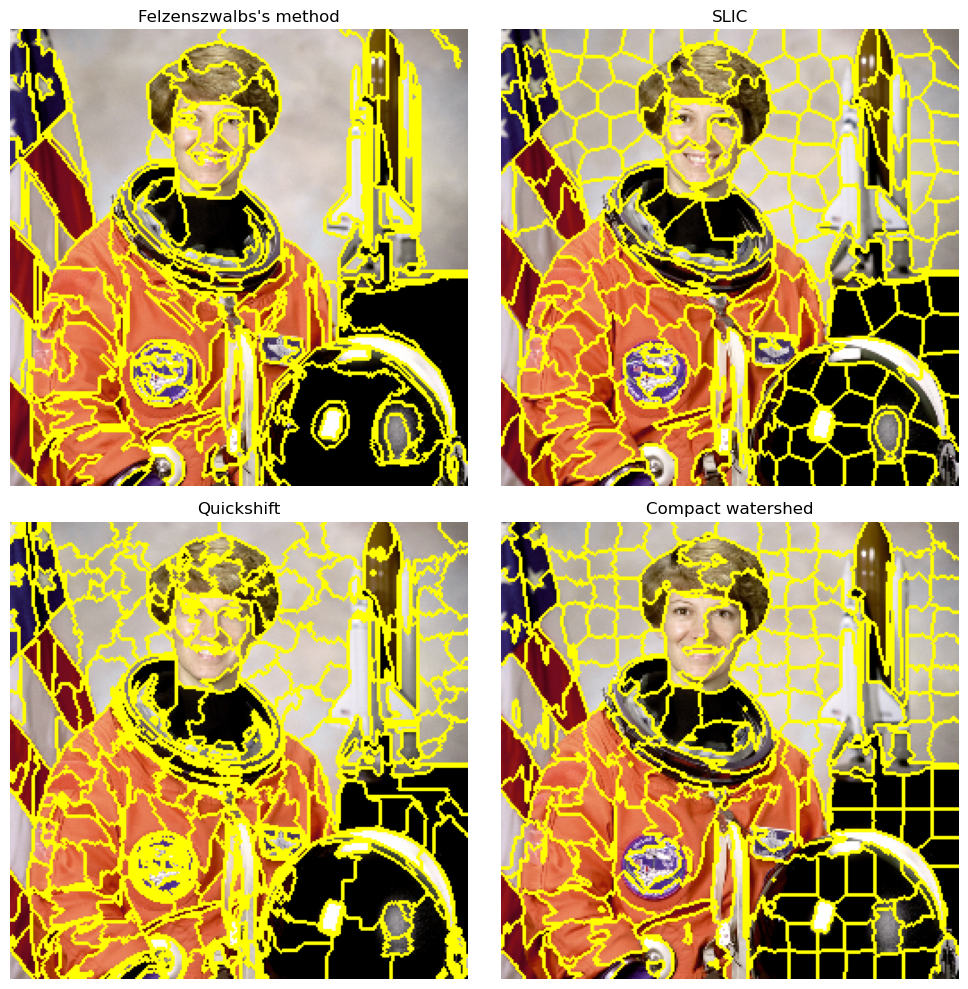

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import (
    felzenszwalb, slic, quickshift, watershed, mark_boundaries
)
from skimage.util import img_as_float

img = img_as_float(astronaut()[::2, ::2])

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=250, compactness=10, sigma=1, start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=250, compactness=0.001)

print(f'Felzenszwalb number of segments:{len(np.unique(segments_fz))}')
print(f'SLIC number of segments: \t{len(np.unique(segments_slic))}')
print(f'Quickshift number of segments: \t{len(np.unique(segments_quick))}')
print(f'Watershed number of segments: \t{len(np.unique(segments_watershed))}')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title("SLIC")
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title("Quickshift")
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title("Compact watershed")

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()